In [31]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cpu'

In [32]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [33]:
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [34]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend()

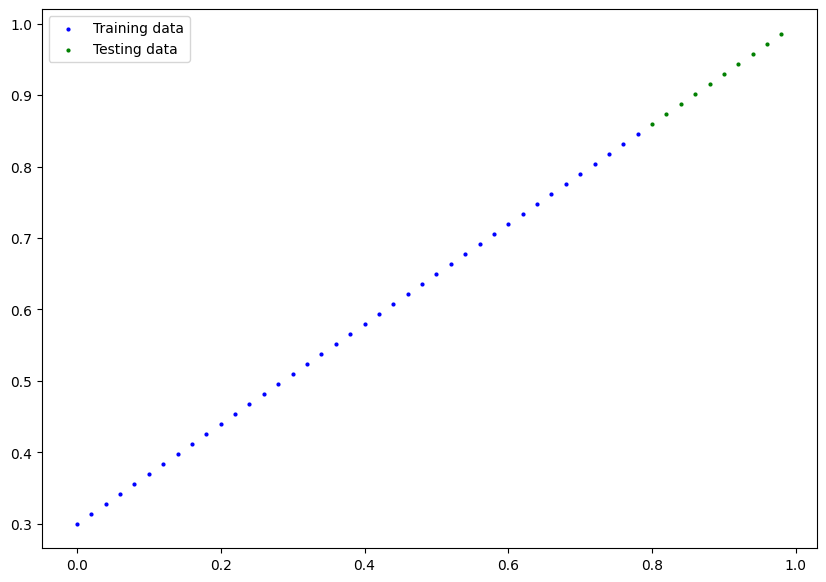

In [35]:
plot_predictions()

In [36]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1, dtype=torch.float, requires_grad=True))

    def forward(self, x):
        return self.weights * x + self.bias

In [37]:
torch.manual_seed(47)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.0530], requires_grad=True),
 Parameter containing:
 tensor([0.0499], requires_grad=True)]

In [38]:
model_0.state_dict()
with torch.inference_mode():
    y_preds = model_0(X_test)

Number of testing samples: 10
Number of predictions made: 10
Predicted values: 
tensor([[0.0924],
        [0.0934],
        [0.0945],
        [0.0955],
        [0.0966],
        [0.0977],
        [0.0987],
        [0.0998],
        [0.1008],
        [0.1019]])


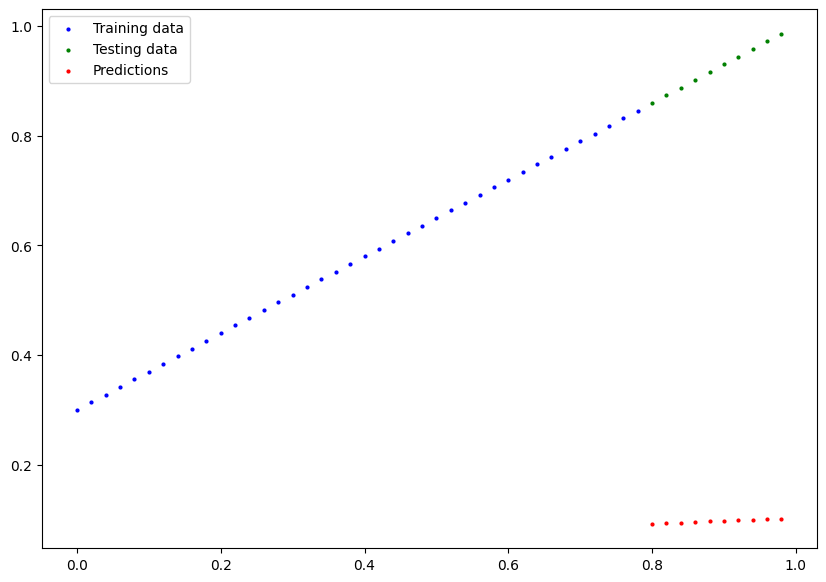

In [39]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values: \n{y_preds}")
plot_predictions(predictions=y_preds)

In [40]:
y_test - y_preds
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [41]:
torch.manual_seed(47)

epoches = 350

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epoches):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_pred =model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())

            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss {test_loss}")

Epoch: 0 | MAE Train Loss: 0.5023919939994812 | MAE Test Loss 0.8123971819877625
Epoch: 10 | MAE Train Loss: 0.38718193769454956 | MAE Test Loss 0.6776871681213379
Epoch: 20 | MAE Train Loss: 0.2719718813896179 | MAE Test Loss 0.5429771542549133
Epoch: 30 | MAE Train Loss: 0.16773030161857605 | MAE Test Loss 0.4159451425075531
Epoch: 40 | MAE Train Loss: 0.11804531514644623 | MAE Test Loss 0.32674330472946167
Epoch: 50 | MAE Train Loss: 0.09729418903589249 | MAE Test Loss 0.2683296799659729
Epoch: 60 | MAE Train Loss: 0.088210329413414 | MAE Test Loss 0.23140168190002441
Epoch: 70 | MAE Train Loss: 0.08313646912574768 | MAE Test Loss 0.20825786888599396
Epoch: 80 | MAE Train Loss: 0.07924078404903412 | MAE Test Loss 0.19249184429645538
Epoch: 90 | MAE Train Loss: 0.07575078308582306 | MAE Test Loss 0.1814717799425125
Epoch: 100 | MAE Train Loss: 0.0722607970237732 | MAE Test Loss 0.17045168578624725
Epoch: 110 | MAE Train Loss: 0.06878305226564407 | MAE Test Loss 0.16011850535869598
Ep

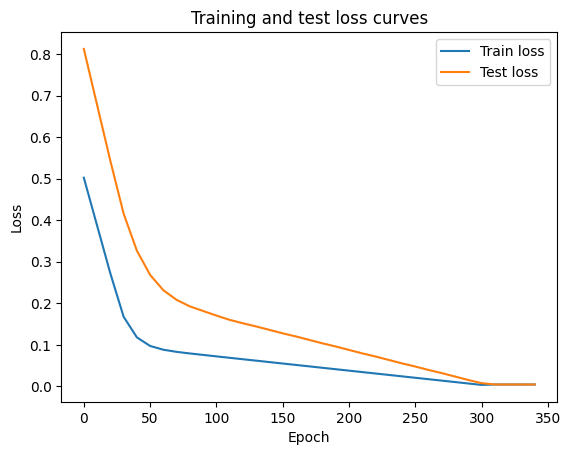

In [42]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [43]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6912])), ('bias', tensor([0.2989]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [44]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8519],
        [0.8657],
        [0.8796],
        [0.8934],
        [0.9072],
        [0.9210],
        [0.9349],
        [0.9487],
        [0.9625],
        [0.9763]])

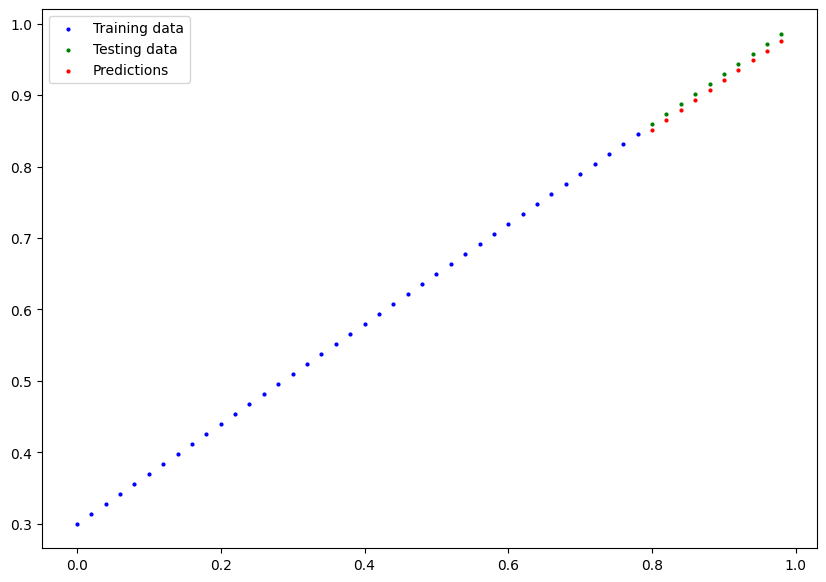

In [45]:
plot_predictions(predictions=y_preds)

In [ ]:
## Saving model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to models\01_pytorch_workflow_model_0.pth


In [51]:
## Loading model
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [52]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [53]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])